# Intern name - Karthik Arumugam

# Task3 - Exploratory Data Analysis - Retail

PROBLEM STATEMENT:- As a business manager, try to find out the weak areas where you can work to make more profit.

### Importing the required libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#### Reading the data

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [3]:
df.shape

(9994, 13)

In [4]:
# Understanding the various features of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### Data Cleaning
##### Checking duplicate values

In [5]:
df[df.duplicated()].shape

(17, 13)

We have some duplicate values in the dataset, let's remove them 

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(9977, 13)

##### Checking null values

In [8]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

We don't have any null values in the dataset which is good

For our analysis postal code data is not required as it does not have much effect, we we will remove it

In [9]:
df.drop('Postal Code',axis=1,inplace=True)

In [10]:
df.shape

(9977, 12)

In [11]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#### We now have a clean dataset, so now we can begin with our Data Analysis

# EDA 

In [12]:
df['Country'].unique()

array(['United States'], dtype=object)

All the data is of USA, so our analysis is going to be on different parts within USA

#### Let's start by analysing the data of states

In [13]:
# Let's see how many states data we have
print('No. of Unique states',df['State'].nunique())
df['State'].unique()

No. of Unique states 49


array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

We have data of 49 States of USA

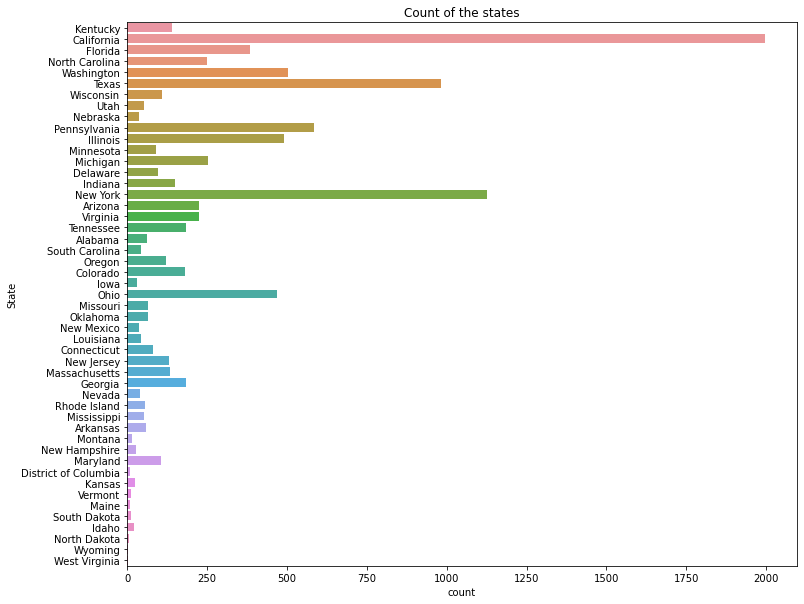

In [14]:
plt.figure(figsize=(12,10))
sns.countplot(data=df,y='State')
plt.title('Count of the states');

In [15]:
#### Top 5 states of U.S. with most no of orders 
df['State'].value_counts().nlargest()

California      1996
New York        1127
Texas            983
Pennsylvania     586
Washington       502
Name: State, dtype: int64

In [16]:
df.groupby('State').sum()['Sales'].reset_index().sort_values(by='Sales',ascending=False)

,State,Sales
3,California,457576.2715
30,New York,310827.1510
41,Texas,170124.5418
45,Washington,138560.8100
36,Pennsylvania,116496.3620
8,Florida,89473.7080
11,Illinois,80162.5370
33,Ohio,77976.7640
20,Michigan,75879.6440
44,Virginia,70636.7200


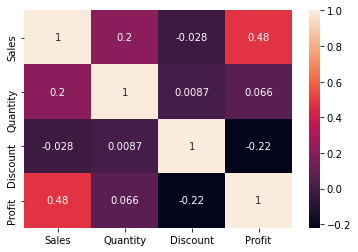

In [17]:
### Let's see the corr b/w the continuous features
sns.heatmap(df.corr(),annot=True);

As with any retail business we can see that the increase in quantity of products increases the sales which in turn increases the profit.

But we can see that discount has a negative relation with sales, telling us increase in discounts has causes loss thereby reducing the profits.

Considering quantity of products its its has a positive relation with both discount and prices which is obvious

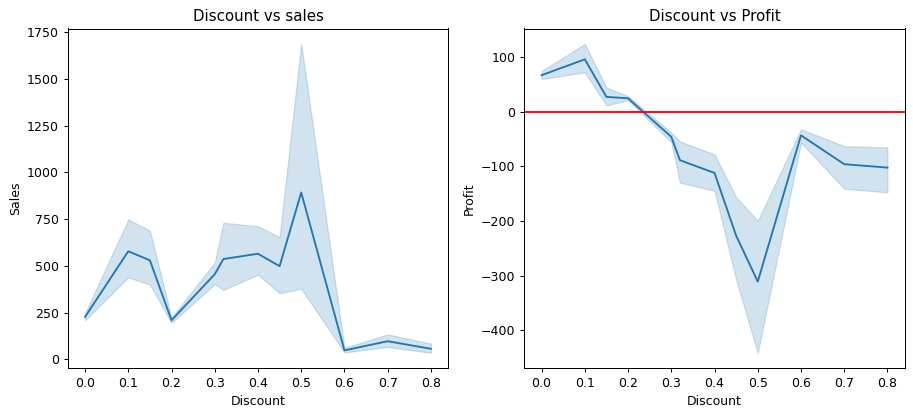

In [18]:
# Let's visualize effect of discount on sales and profit
plt.figure(figsize=(12,5),dpi=90)

plt.subplot(1,2,1)
sns.lineplot(data=df,x='Discount',y='Sales')
plt.title('Discount vs sales')

plt.subplot(1,2,2)
sns.lineplot(data=df,x='Discount',y='Profit')
plt.title('Discount vs Profit')
plt.axhline(y=0,color='red');

##### Analysis from above plots:- Providing discounts on products has brought in loss in most of the cases, so maybe providing discounts should not be considered

In [19]:
# Let's see the different category people buy products in
segments = df['Segment'].value_counts()
segments

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

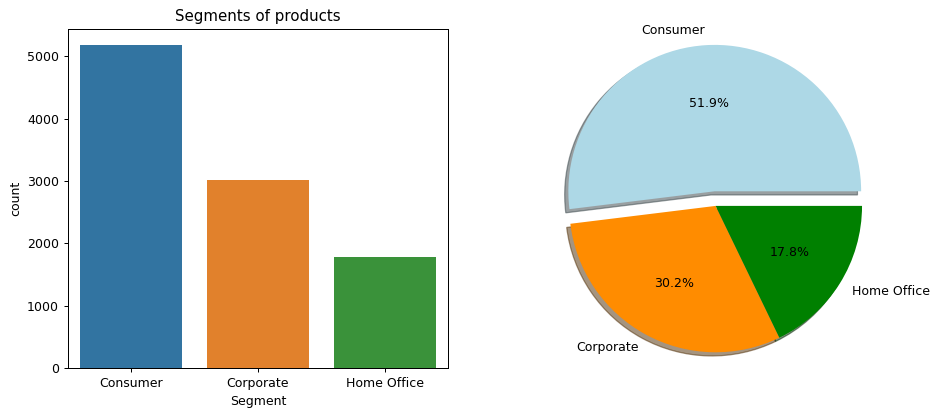

In [20]:
plt.figure(figsize=(12,5),dpi=90)

plt.subplot(1,2,1)
sns.countplot(data=df,x='Segment')
plt.title('Segments of products')

plt.subplot(1,2,2)
labels = segments.index
sizes = segments.values
colors = ['lightblue','darkorange','green']
explode = (0.1,0,0) #explode 1st list
plt.pie(sizes,explode=explode, labels=labels,colors=colors, autopct='%1.1f%%', shadow = True)
plt.axis('equal');

##### We can see that most products bought belong to the Consumer category, about 52%
##### Rest of them belong to the corporate and Home office sector.

To understand the data better we can seperately analyze products by the Segments and see which how they perfom across the states

## 1.Consumer segement products

In [21]:
consumer_prod = df[df['Segment'] == 'Consumer']
consumer_prod.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,48.8600,7,0.00,14.1694


In [22]:
consumer_prod['State'].nunique()

47

In [23]:
consumer_prod['State'].unique()

array(['Kentucky', 'Florida', 'California', 'North Carolina',
       'Washington', 'Wisconsin', 'Utah', 'Pennsylvania', 'Michigan',
       'Delaware', 'Indiana', 'New York', 'Virginia', 'Tennessee',
       'Texas', 'South Carolina', 'Minnesota', 'Colorado', 'Iowa', 'Ohio',
       'Illinois', 'Arizona', 'Missouri', 'Oklahoma', 'New Mexico',
       'Connecticut', 'New Jersey', 'Oregon', 'Massachusetts',
       'Mississippi', 'Arkansas', 'Georgia', 'Alabama', 'Nebraska',
       'New Hampshire', 'District of Columbia', 'Maryland',
       'Rhode Island', 'Nevada', 'Louisiana', 'Montana', 'South Dakota',
       'Kansas', 'North Dakota', 'Idaho', 'Vermont', 'West Virginia'],
      dtype=object)

##### It seems that almost all the states in US buy consumer products

In [24]:
all_states = df['State']

In [25]:
print("States not buying the Consumer products:-")
res = all_states[~all_states.isin(consumer_prod['State'])]
print(res.unique())

States not buying the Consumer products:-
['Maine' 'Wyoming']


#### Let's see which category of consumer products has been bought more

In [26]:
consumer_category = consumer_prod['Category'].value_counts()
consumer_category

Office Supplies    3120
Furniture          1112
Technology          951
Name: Category, dtype: int64

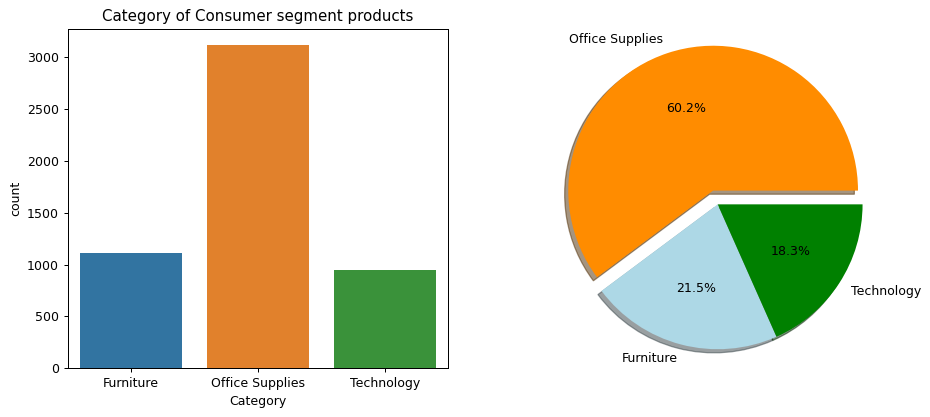

In [27]:
plt.figure(figsize=(12,5),dpi=90)

plt.subplot(1,2,1)
sns.countplot(data=consumer_prod,x='Category')
plt.title('Category of Consumer segment products')

plt.subplot(1,2,2)
labels = consumer_category.index
sizes = consumer_category.values
colors = ['darkorange','lightblue','green']
explode = (0.1,0,0) #explode 1st list
plt.pie(sizes,explode=explode, labels=labels,colors=colors, autopct='%1.1f%%', shadow = True)
plt.axis('equal');

We can see that in Consumer segment - Office supplies accounts for 60% of the products, followed by Furniture with 21.5% and Technology with 18.3% products.

The above data tells us that In Consumer segment focussing more on Office supplies category can give more sales result, as for other 2 category.

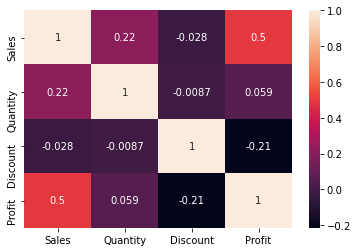

In [28]:
### Let's see the relation between different features 
sns.heatmap(consumer_prod.corr(),annot=True);

##### Again we can see that provind discounts on consumer segment category products is giving negative profits

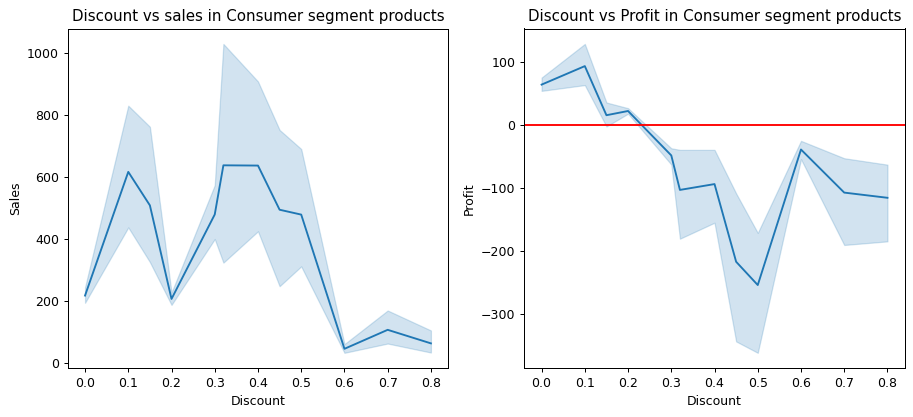

In [29]:
# Let's visualize effect of discount on sales and profit
plt.figure(figsize=(12,5),dpi=90)

plt.subplot(1,2,1)
sns.lineplot(data=consumer_prod,x='Discount',y='Sales')
plt.title('Discount vs sales in Consumer segment products')

plt.subplot(1,2,2)
sns.lineplot(data=consumer_prod,x='Discount',y='Profit')
plt.title('Discount vs Profit in Consumer segment products')
plt.axhline(y=0,color='red');

#### We can see that providing more discounts on products has increased the sales of the products but on the other hand it has drastically reduced the profits.
#### We can see in Discount vs Profit plot- that providing discounts upto 19-20% has seen little profits, but discounts any higher than this has negative profits.
#### So it can be concluded that only 19-20% discounts should be given on consumer products to see good profits

In [30]:
consumer_sub_cat = consumer_prod['Sub-Category'].value_counts()
consumer_sub_cat.shape

(17,)

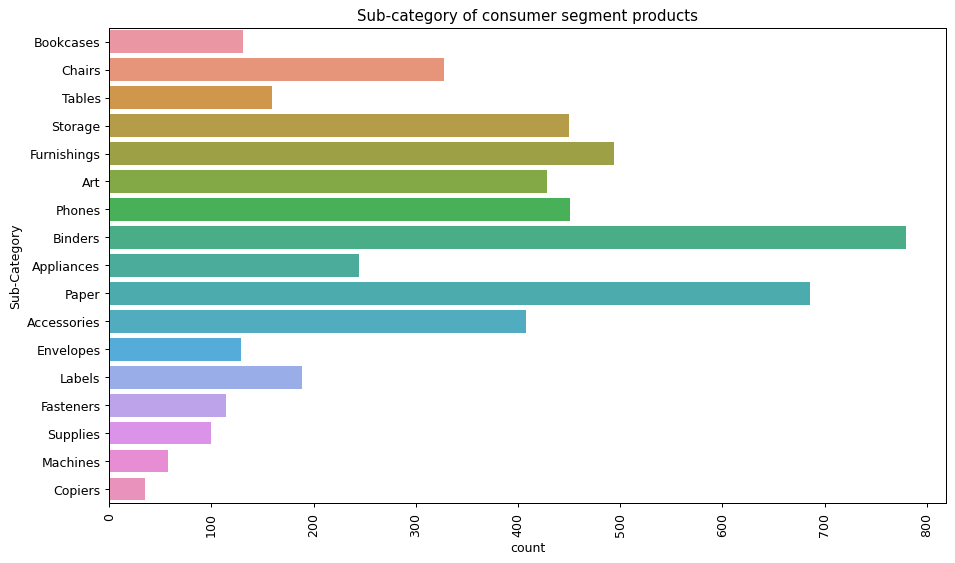

In [31]:
plt.figure(figsize=(12,7),dpi=90)

sns.countplot(data=consumer_prod,y='Sub-Category')
plt.title('Sub-category of consumer segment products')
plt.xticks(rotation=90);

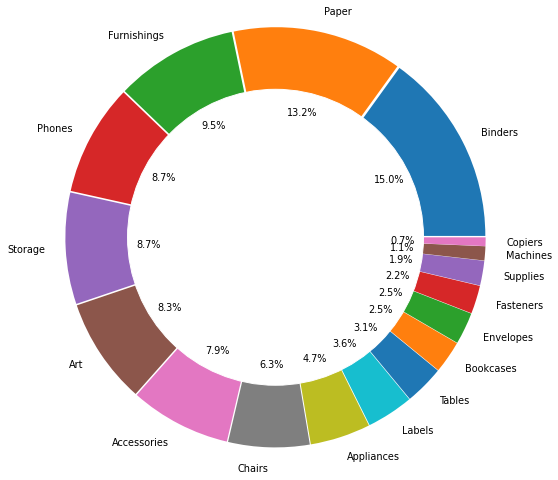

In [32]:
plt.figure(figsize=(10,7),dpi=70)
labels = consumer_sub_cat.index
sizes = consumer_sub_cat.values
#colors = ['gold','yellowgreen','lightskyblue']
explode = (0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02) #explode 1st list
plt.pie(sizes, labels=labels,explode=explode,startangle=0, autopct='%1.1f%%', radius=1.4)
my_circle=plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show();

We can see that in USA in consumer segments products the top most bought products are - Binders, Paper products, Furnishings, Phones, Storage devices, etc which seem to the products people use in their day to day lives.

As we analyzed above in discounts upto only 19-20% should be offered on these products to see more profits

In [33]:
# Let's see geographic distribution wise data to where most consumer products were bought
consumer_prod['State'].value_counts()

California              1045
New York                 642
Texas                    523
Pennsylvania             284
Illinois                 276
Washington               274
Ohio                     255
Florida                  180
North Carolina           142
Michigan                 131
Virginia                 117
Arizona                  110
Tennessee                100
Colorado                  95
Georgia                   85
Kentucky                  76
Indiana                   73
Oregon                    66
Massachusetts             58
New Jersey                57
Minnesota                 51
Delaware                  49
Maryland                  46
Connecticut               43
Missouri                  38
Arkansas                  37
Wisconsin                 35
Oklahoma                  35
Utah                      31
Mississippi               28
Louisiana                 26
Alabama                   25
South Carolina            22
Nebraska                  19
Nevada        

In [34]:
consumer_region = consumer_prod['Region'].value_counts()
consumer_region

West       1667
East       1468
Central    1210
South       838
Name: Region, dtype: int64

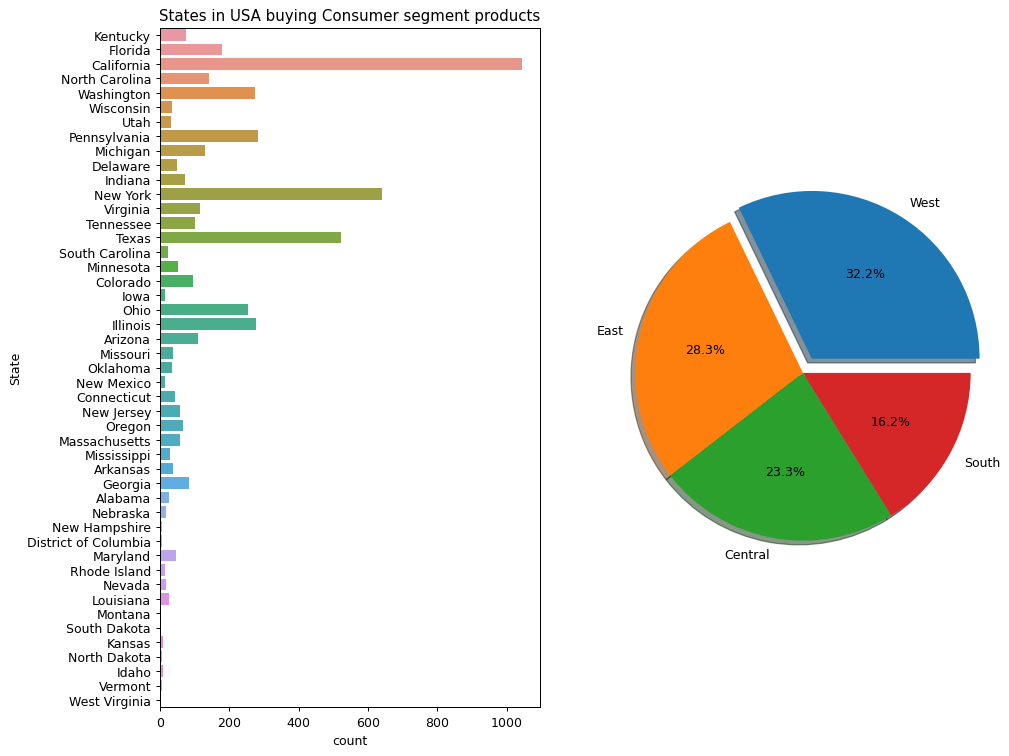

In [35]:
plt.figure(figsize=(12,10),dpi=90)

plt.subplot(1,2,1)
sns.countplot(data=consumer_prod,y='State')
plt.title('States in USA buying Consumer segment products')

plt.subplot(1,2,2)
labels = consumer_region.index
sizes = consumer_region.values
#colors = ['gold','yellowgreen','lightskyblue']
explode = (0.1,0,0,0) #explode 1st list
plt.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%', shadow = True)
plt.axis('equal');

#### West region of USA is where most consumer products are bought.
#### Top USA states buying consumer products include California, New York, Texas, Pennsylvania,Illinois   

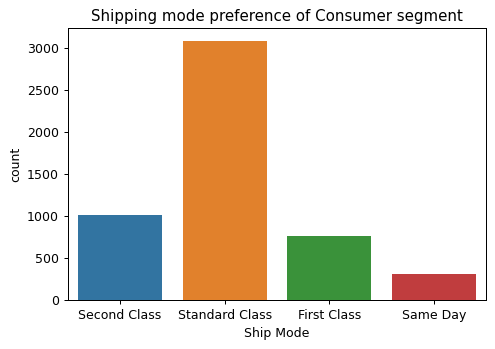

In [36]:
plt.figure(dpi=90)
sns.countplot(data=consumer_prod,x='Ship Mode')
plt.title('Shipping mode preference of Consumer segment');

Most of the people buying consumer products prefer Standard Shipping

### Consumer Segment Analysis key points:-
1. Discount rate only upto 19-20% bring positive profits.
2. West and East USA states buy more of these segment products, so more discounts.
3. Standard class shipping is preferred over other methods of shipping.
4. At about 60% Office supplies category products are bought in huge no.s so shipping cost these products can be minimized along with recommended discount so that sales go even higher.
5. To get more sales and profits in the products that are bought less, positive changes can be seen if we provide incentives on buying those products which will attract sales.## Consumer products analysis:-

## 2.Corporate segment products

In [37]:
corporate_prod = df[df['Segment'] == 'Corporate']
corporate_prod.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.620,2,0.0,6.8714
21,Standard Class,Corporate,United States,Fremont,Nebraska,Central,Office Supplies,Art,19.460,7,0.0,5.0596
22,Standard Class,Corporate,United States,Fremont,Nebraska,Central,Office Supplies,Appliances,60.340,7,0.0,15.6884
35,First Class,Corporate,United States,Richardson,Texas,Central,Technology,Phones,1097.544,7,0.2,123.4737
36,First Class,Corporate,United States,Richardson,Texas,Central,Furniture,Furnishings,190.920,5,0.6,-147.9630


In [38]:
corporate_prod['State'].nunique()

45

#### We can see that 4 states in USA are not buying corporate products

In [39]:
print("States not buying the Corporate products:-")
res = all_states[~all_states.isin(corporate_prod['State'])]
print(res.unique())

States not buying the Corporate products:-
['District of Columbia' 'North Dakota' 'Wyoming' 'West Virginia']


#### Let's see which state buys more Corporate products

In [40]:
corporate_prod['State'].value_counts()

California        617
New York          321
Texas             311
Pennsylvania      196
Florida           136
Washington        129
Ohio              123
Illinois          119
North Carolina     75
Michigan           70
Arizona            69
Virginia           62
Georgia            59
Colorado           57
Tennessee          56
New Jersey         50
Wisconsin          47
Maryland           44
Indiana            41
Massachusetts      40
Oregon             38
Delaware           36
Kentucky           35
Alabama            28
Connecticut        27
Rhode Island       21
South Carolina     19
Minnesota          16
Missouri           15
Arkansas           14
Mississippi        14
Nevada             13
Nebraska           13
Louisiana          12
Utah               12
New Mexico         11
Oklahoma           11
South Dakota       10
Iowa               10
Idaho               9
New Hampshire       9
Kansas              8
Maine               5
Vermont             5
Montana             2
Name: Stat

In [42]:
corporate_region = corporate_prod['Region']
corporate_region = corporate_region.value_counts()

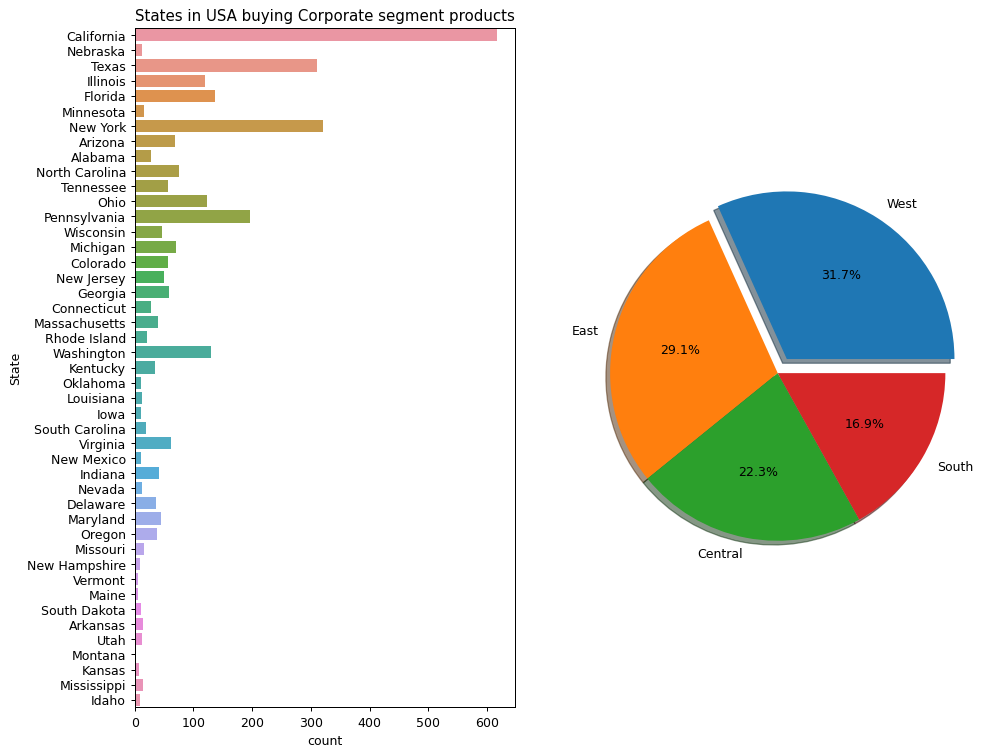

In [43]:
plt.figure(figsize=(12,10),dpi=90)

plt.subplot(1,2,1)
sns.countplot(data=corporate_prod,y='State')
plt.title('States in USA buying Corporate segment products')

plt.subplot(1,2,2)
labels = corporate_region.index
sizes = corporate_region.values
#colors = ['gold','yellowgreen','lightskyblue']
explode = (0.1,0,0,0) #explode 1st list
plt.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%', shadow = True)
plt.axis('equal');

#### Again we can see that West and East Part of USA seems to by more Corporate segments products - this may be due to most of the developed and economically importatnt states of USA are in this region.
#### The top 5 states buying these products are California, NewYork, Texas, Pennsylvania and Florida.

#### Let's see how sales and profit of Corporate segment products are based on the discounts given on these products

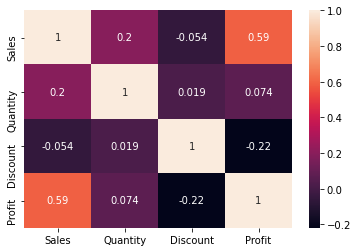

In [44]:
sns.heatmap(corporate_prod.corr(),annot=True);

Here also we can see that Discount is negatively related with both sales and profit

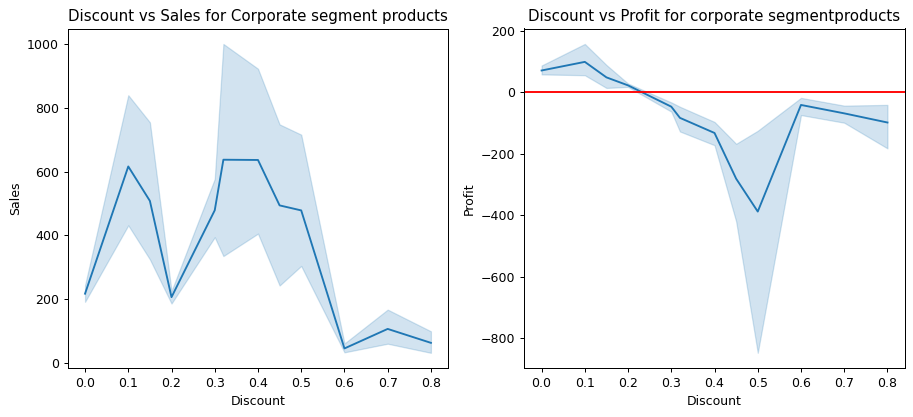

In [45]:
# Let's visualize it
plt.figure(figsize=(12,5),dpi=90)

plt.subplot(1,2,1)
sns.lineplot(data=consumer_prod,x='Discount',y='Sales')
plt.title('Discount vs Sales for Corporate segment products')

plt.subplot(1,2,2)
sns.lineplot(data=corporate_prod,x='Discount',y='Profit')
plt.title('Discount vs Profit for corporate segmentproducts')
plt.axhline(y=0,color='red');

#### As we saw from the heatmap we can see that increasing discounts has increased the sales but in turn it reduced the profits drastically.
 
#### We can see that  upto 15-20% of discount has brought positive profit, but discounts nay higher than that has negative profits, so this should be the max discounts on Corporate products

##### Let's see which category of Corporate segment products has been brought more

In [46]:
corporate_cat = corporate_prod['Category'].value_counts()
corporate_cat

Office Supplies    1815
Furniture           646
Technology          554
Name: Category, dtype: int64

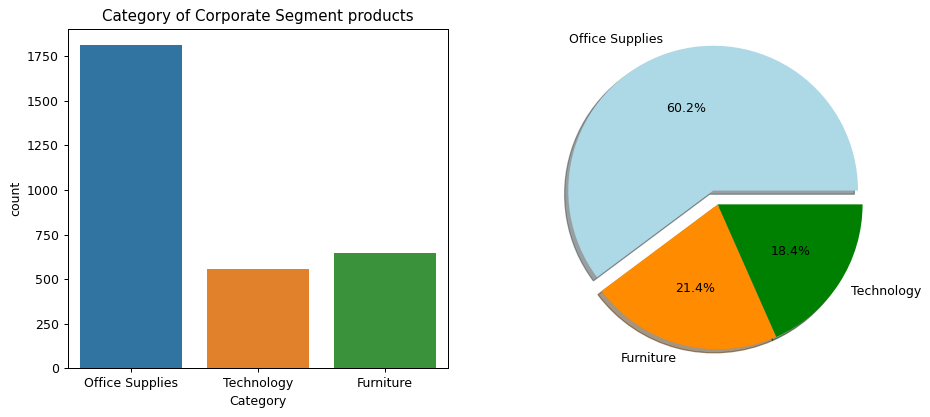

In [47]:
plt.figure(figsize=(12,5),dpi=90)

plt.subplot(1,2,1)
sns.countplot(data=corporate_prod,x='Category')
plt.title('Category of Corporate Segment products')

plt.subplot(1,2,2)
labels = corporate_cat.index
sizes = corporate_cat.values
colors = ['lightblue','darkorange','green']
explode = (0.1,0,0) #explode 1st list
plt.pie(sizes,explode=explode, labels=labels,colors=colors, autopct='%1.1f%%', shadow = True)
plt.axis('equal');

Within Coprorate segment - Office supplies products have been brought more than other two categories, which is also obvious in a Corporate scenario

### Let's see the different sub category of  different category products most brought under Corporate segment

In [48]:
corp_sub_cat_office_sup  = corporate_prod[corporate_prod['Category'] == 'Office Supplies']
corp_office_sup = corp_sub_cat_office_sup['Sub-Category'].value_counts()
corp_office_sup_ = corp_office_sup.reset_index()
corp_office_sup_

,index,Sub-Category
0,Binders,472
1,Paper,405
2,Storage,260
3,Art,217
4,Appliances,155
5,Labels,102
6,Envelopes,84
7,Supplies,61
8,Fasteners,59


In [49]:
corp_sub_cat_furni  = corporate_prod[corporate_prod['Category'] == 'Furniture']
corp_furni = corp_sub_cat_furni['Sub-Category'].value_counts()
corp_furni_ = corp_furni.reset_index()
corp_furni_

,index,Sub-Category
0,Furnishings,288
1,Chairs,188
2,Tables,106
3,Bookcases,64


In [50]:
corp_sub_cat_tech  = corporate_prod[corporate_prod['Category'] == 'Technology']
corp_tech = corp_sub_cat_tech['Sub-Category'].value_counts()
corp_tech_ = corp_tech.reset_index()
corp_tech_

,index,Sub-Category
0,Phones,272
1,Accessories,227
2,Machines,35
3,Copiers,20


#### We can see why office supplies has the most sales in Corporate segment, most products belong to this category

##### Let's visualize them

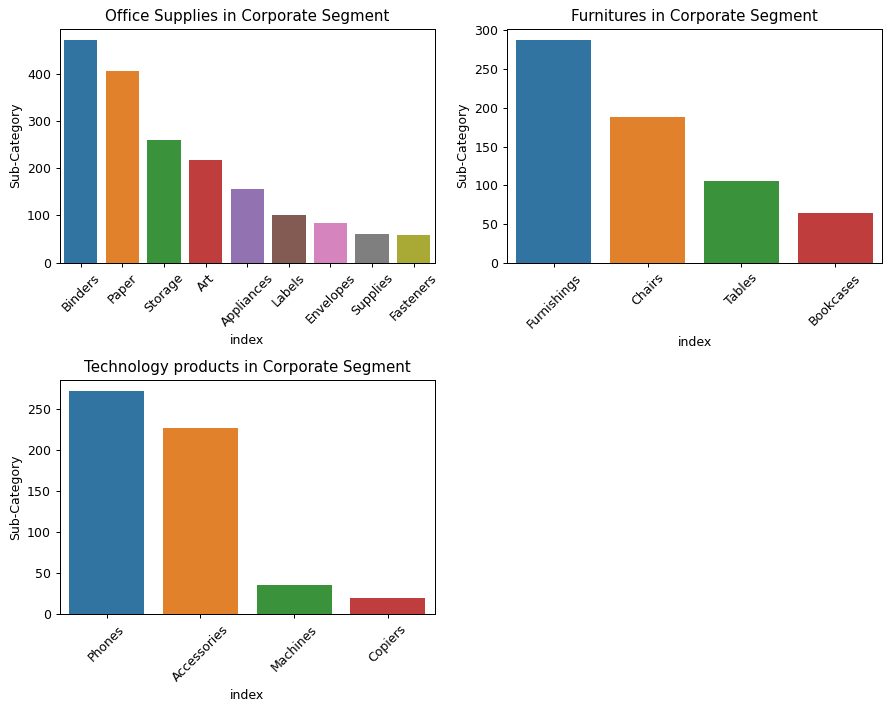

In [51]:
plt.figure(figsize=(10,8),dpi=90)

plt.subplot(2,2,1)
sns.barplot(data=corp_office_sup_,x='index',y='Sub-Category')
plt.xticks(rotation=45)
plt.title('Office Supplies in Corporate Segment');

plt.subplot(2,2,2)
sns.barplot(data=corp_furni_,x='index',y='Sub-Category')
plt.xticks(rotation=45)
plt.title('Furnitures in Corporate Segment');

plt.subplot(2,2,3)
sns.barplot(data=corp_tech_,x='index',y='Sub-Category')
plt.xticks(rotation=45)
plt.title('Technology products in Corporate Segment');

plt.tight_layout()

#### Let's see the mode of shipment people prefer for Corporate Segment products

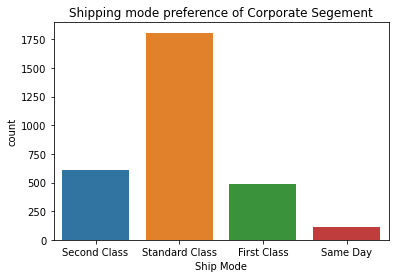

In [52]:
sns.countplot(data=corporate_prod,x='Ship Mode')
plt.title('Shipping mode preference of Corporate Segement');

For Coprorate Segemnt products also Standard class shipment is preferred more

### Corporate Segment Analysis key points:-
1. Discount rate only upto 15-20% bring positive profits.
2. West and East USA states buy more of these segment products.
3. Standard shipping is preferred over other methods of shipping.
4. At 60% - Office supplies category products are bought in huge no.s so shipping cost these products can be minimized along with recommended discount so that the sales go even higher.
5. To get more sales and profits in the products that are bought less, positive changes can be seen if we provide incentives on buying those products which will attract sales.

## 3.Home Office Segment

In [53]:
home_office = df[df['Segment'] == 'Home Office']
home_office.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
14,Standard Class,Home Office,United States,Fort Worth,Texas,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
34,Second Class,Home Office,United States,Houston,Texas,Central,Office Supplies,Paper,29.4720,3,0.20,9.9468
37,Standard Class,Home Office,United States,Houston,Texas,Central,Office Supplies,Envelopes,113.3280,9,0.20,35.4150
38,Standard Class,Home Office,United States,Houston,Texas,Central,Furniture,Bookcases,532.3992,3,0.32,-46.9764


In [54]:
# Let's see if all states in USA buy home office segmennt product
home_office['State'].nunique()

48

In [55]:
print("States not buying the Corporate products:-")
res = all_states[~all_states.isin(home_office['State'])]
print(res.unique())

States not buying the Corporate products:-
['South Dakota']


 Only south Dakota does not buy home office products

### Let's see which state in USA buys more home office segment products

In [56]:
homeoffice_region = home_office['Region'].value_counts()
homeoffice_region

West       569
East       500
Central    438
South      272
Name: Region, dtype: int64

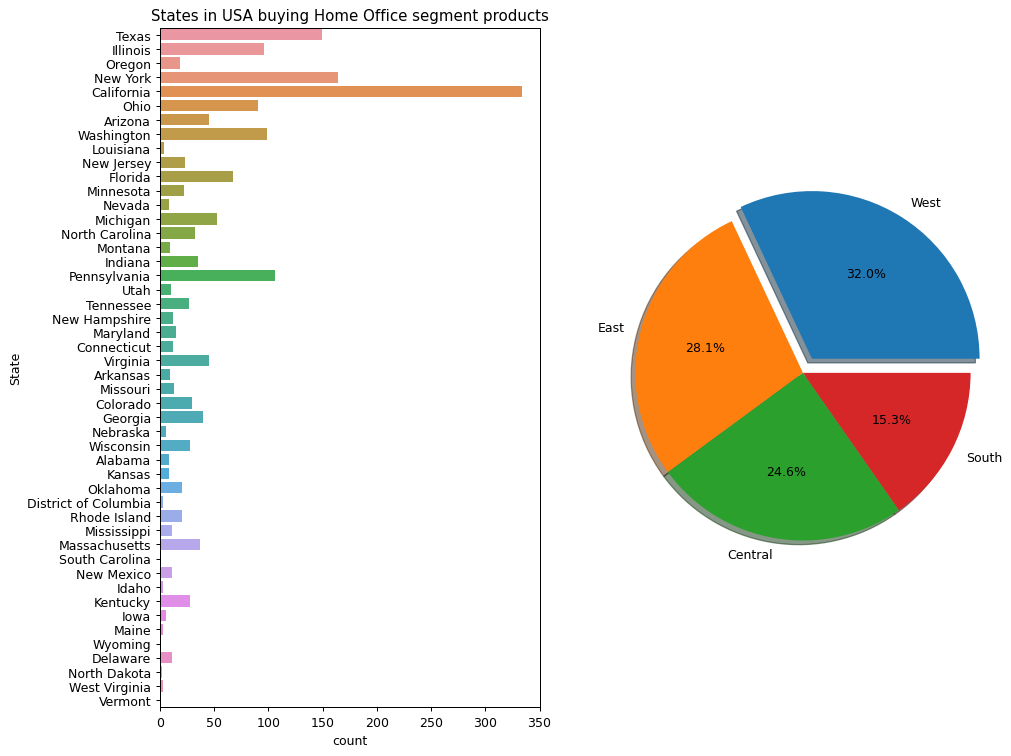

In [57]:
plt.figure(figsize=(12,10),dpi=90)

plt.subplot(1,2,1)
sns.countplot(data=home_office,y='State')
plt.title('States in USA buying Home Office segment products')

plt.subplot(1,2,2)
labels = homeoffice_region.index
sizes = homeoffice_region.values
#colors = ['gold','yellowgreen','lightskyblue']
explode = (0.1,0,0,0) #explode 1st list
plt.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%', shadow = True)
plt.axis('equal');

#### Except South region of USA home office products are bought in most parts of the country.
#### Top USA states buying home office products include California, New York, Texas, Pennsylvania,Washington

#### Let's see how sales and profit of Home office products are based on the discounts given on these products

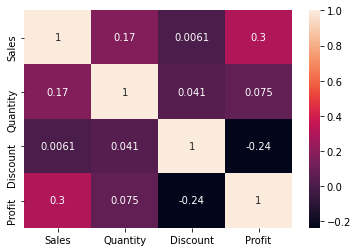

In [58]:
sns.heatmap(home_office.corr(),annot=True);

Here also we can see that Discount is negatively related with profits

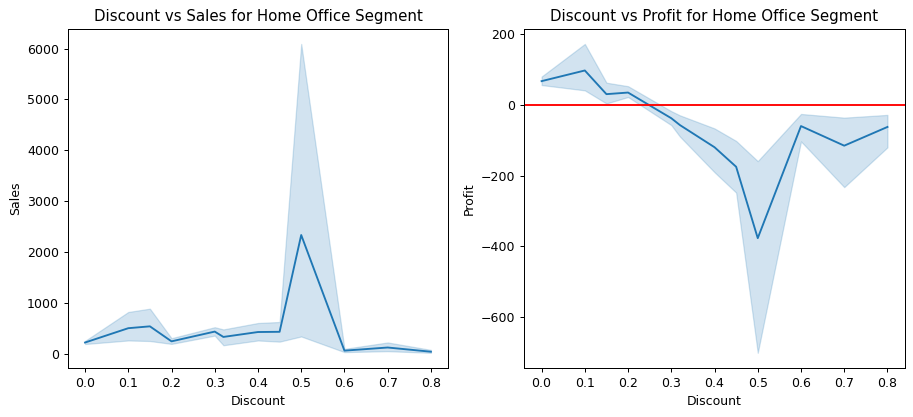

In [59]:
# Let's visualize it
plt.figure(figsize=(12,5),dpi=90)

plt.subplot(1,2,1)
sns.lineplot(data=home_office,x='Discount',y='Sales')
plt.title('Discount vs Sales for Home Office Segment')

plt.subplot(1,2,2)
sns.lineplot(data=home_office,x='Discount',y='Profit')
plt.title('Discount vs Profit for Home Office Segment')
plt.axhline(y=0,color='red');

#### As we saw from the heatmap we can see that increasing discounts has increased the sales but in turn it reduced the profits drastically.

#### We can see that  upto 20-25% of discount has brought positive profit, but discounts nay higher than that has negative profits, so this shoud be the max discounts on Home Office segment.

##### Let's see which category of Home Office products has been brought more

In [60]:
homeoffice_cat = home_office['Category'].value_counts()
homeoffice_cat

Office Supplies    1077
Furniture           360
Technology          342
Name: Category, dtype: int64

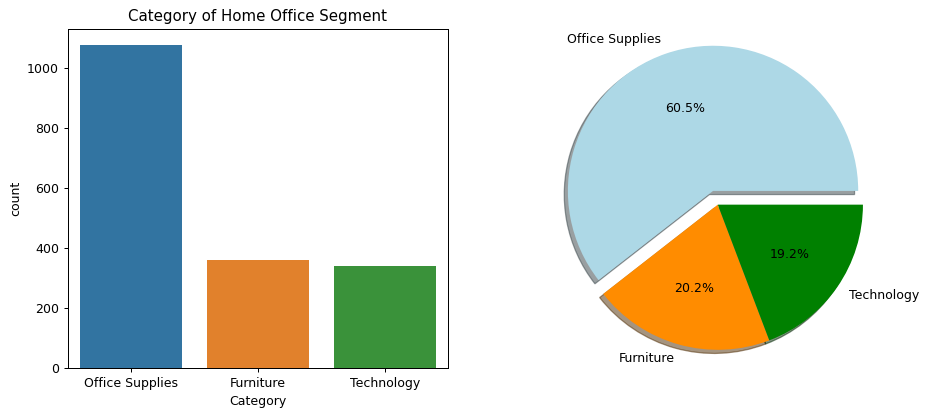

In [61]:
plt.figure(figsize=(12,5),dpi=90)

plt.subplot(1,2,1)
sns.countplot(data=home_office,x='Category')
plt.title('Category of Home Office Segment')

plt.subplot(1,2,2)
labels = homeoffice_cat.index
sizes = homeoffice_cat.values
colors = ['lightblue','darkorange','green']
explode = (0.1,0,0) #explode 1st list
plt.pie(sizes,explode=explode, labels=labels,colors=colors, autopct='%1.1f%%', shadow = True)
plt.axis('equal');

Within Home Office Segment - Office supplies products have been brought more than other two categories.

### Let's see the different sub category of  different category products most brought under Home Office segment


In [62]:
homeoffice_cat_sub_cat = home_office[home_office['Category'] == 'Office Supplies']
homeoffice_sub = homeoffice_cat_sub_cat['Sub-Category'].value_counts().reset_index()

homeoffice_cat_sub_cat_Furni = home_office[home_office['Category'] == 'Furniture']
homeoffice_sub_furni_furni = homeoffice_cat_sub_cat_Furni['Sub-Category'].value_counts().reset_index()

homeoffice_cat_sub_cat_tech = home_office[home_office['Category'] == 'Technology']
homeoffice_sub_tech = homeoffice_cat_sub_cat_tech['Sub-Category'].value_counts().reset_index()

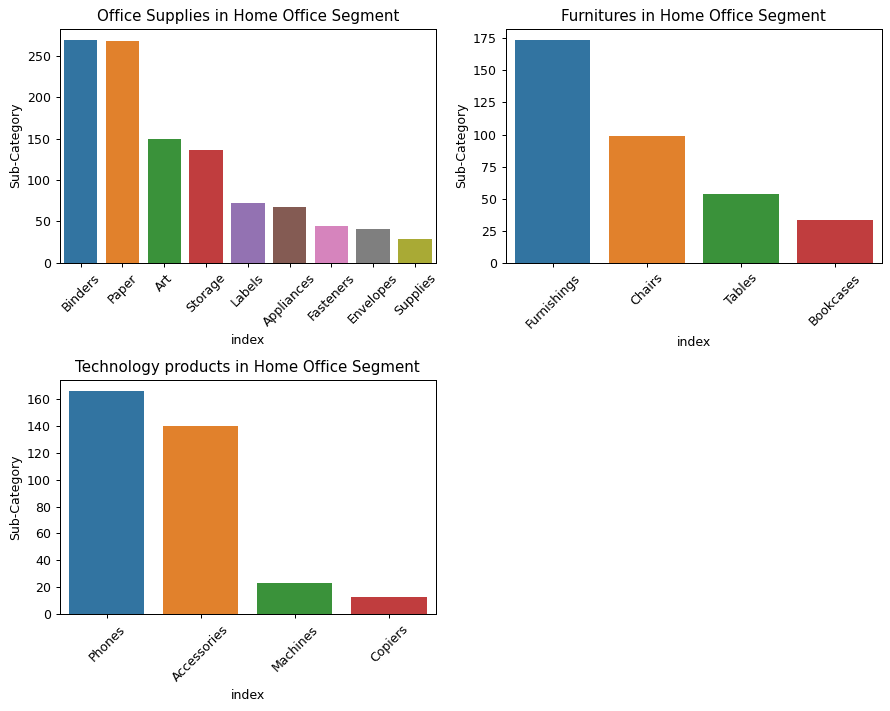

In [63]:
#Let's visualize them
plt.figure(figsize=(10,8),dpi=90)

plt.subplot(2,2,1)
sns.barplot(data=homeoffice_sub,x='index',y='Sub-Category')
plt.xticks(rotation=45)
plt.title('Office Supplies in Home Office Segment');

plt.subplot(2,2,2)
sns.barplot(data=homeoffice_sub_furni_furni,x='index',y='Sub-Category')
plt.xticks(rotation=45)
plt.title('Furnitures in Home Office Segment');

plt.subplot(2,2,3)
sns.barplot(data=homeoffice_sub_tech,x='index',y='Sub-Category')
plt.xticks(rotation=45)
plt.title('Technology products in Home Office Segment');

plt.tight_layout()

We can see than within each sub category of their respective category of products in Home Office segements the same products as in first two segements top the sales

#### Let's see the mode of shipment preferred by Home Office Segement buyers

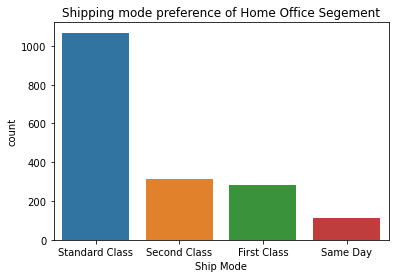

In [64]:
sns.countplot(data=home_office,x='Ship Mode')
plt.title('Shipping mode preference of Home Office Segement');

Even for Home Office Segment Standard class shipping is preferred the most

### Home Office Segment Analysis key points:-
1. Discount rate only upto 20-25% bring positive profits.
2. Other than South USA states others buy more of these segment products.
3. Standard class shipping is preferred over other methods of shipping.
4. At about 60.5% - Office supplies category products are bought in huge no.s so shipping cost these products can be minimized along with recommended discount so that the sales go even higher.
5. To get more sales and profits in the products that are bought less, positive changes can be seen if we provide incentives on buying those products which will attract sales.

# Thank You !!!